# **Sarcasm Detection**

This notebook explores the task of sarcasm detection using three distinct neural network architectures: one with an LSTM layer, one with a convolutional layer, and one with a GRU layer. By employing the same hyperparameters across all models, it aims to observe and compare the performance and characteristics of each layer type in the context of sarcasm detection. This comparison provides insights into how each architecture handles the nuances of textual data and contributes to the overall effectiveness of sarcasm detection.

In [5]:
# Download the dataset
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2024-05-18 00:49:54--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.101.207, 142.250.141.207, 142.251.2.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.101.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  --.-KB/s    in 0.06s   

2024-05-18 00:49:54 (84.8 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [6]:
import json

# Load the JSON file
with open("./sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

# Collect sentences and labels into the lists
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [7]:
#split data into training_and testing

from sklearn.model_selection import train_test_split

training_sentences, testing_sentences, training_labels, testing_labels = train_test_split(sentences, labels, test_size=0.2, random_state=1000)


In [8]:
print(len(training_sentences), len(training_labels))
print(len(testing_sentences), len(testing_labels))

21367 21367
5342 5342


##Data Preprocessing


In [9]:
import numpy as np
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
vocab_size = 10000
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

# Initialize the Tokenizer class
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)

# Generate the word index dictionary
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# Generate and pad the training sequences
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Generate and pad the testing sequences
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Convert the labels lists into numpy arrays
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [11]:
import tensorflow as tf

##Model_1: Using LSTM

#####LSTM (Long Short-Term Memory) networks are essential for tasks that require attention to word order, despite their slower processing speed. For sarcasm detection, maintaining the sequence of words is advantageous as it helps the model capture the context that contribute to sarcastic expressions.

In [12]:
# Parameters
embedding_dim = 16
lstm_dim = 32
dense_dim = 6

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(lstm_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirection  (None, 64)                12544     
 al)                                                             
                                                                 
 dense (Dense)               (None, 6)                 390       
                                                                 
 dense_1 (Dense)             (None, 1)                 7         
                                                                 
Total params: 172941 (675.55 KB)
Trainable params: 172941 (675.55 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
history_lstm = model_lstm.fit(training_padded, training_labels, batch_size=128, epochs=10, validation_data=(testing_padded, testing_labels))

Epoch 1/10
167/167 [==============================] - 30s 148ms/step - loss: 0.5751 - accuracy: 0.6962 - val_loss: 0.3918 - val_accuracy: 0.8261
Epoch 2/10
167/167 [==============================] - 25s 150ms/step - loss: 0.2910 - accuracy: 0.8760 - val_loss: 0.3278 - val_accuracy: 0.8617
Epoch 3/10
167/167 [==============================] - 22s 130ms/step - loss: 0.1954 - accuracy: 0.9239 - val_loss: 0.3347 - val_accuracy: 0.8624
Epoch 4/10
167/167 [==============================] - 21s 128ms/step - loss: 0.1395 - accuracy: 0.9491 - val_loss: 0.3654 - val_accuracy: 0.8615
Epoch 5/10
167/167 [==============================] - 20s 122ms/step - loss: 0.0985 - accuracy: 0.9666 - val_loss: 0.4294 - val_accuracy: 0.8545
Epoch 6/10
167/167 [==============================] - 20s 120ms/step - loss: 0.0723 - accuracy: 0.9768 - val_loss: 0.4830 - val_accuracy: 0.8510
Epoch 7/10
167/167 [==============================] - 19s 113ms/step - loss: 0.0490 - accuracy: 0.9860 - val_loss: 0.5720 - val_ac

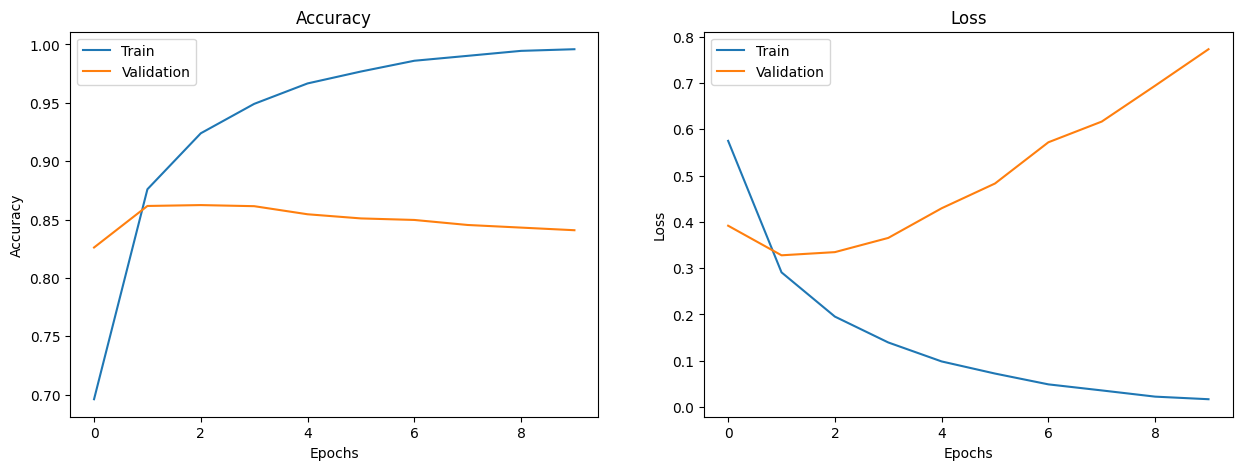

In [14]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the accuracy history on the first subplot
ax1.plot(history_lstm.history['accuracy'])
ax1.plot(history_lstm.history['val_accuracy'])
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot the loss history on the second subplot
ax2.plot(history_lstm.history['loss'])
ax2.plot(history_lstm.history['val_loss'])
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(['Train', 'Validation'], loc='upper left')

# Show the plot
plt.show()


167/167 [==============================] - 4s 27ms/step


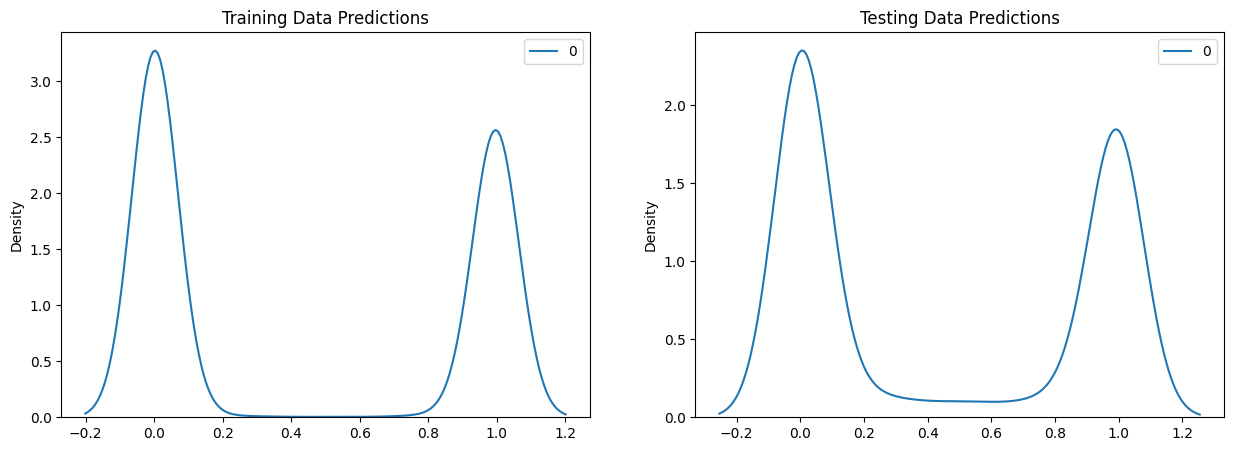

In [26]:
# Kernel Density Plots of LSTM Model Predictions for Training and Testing Data

# Calculate the predicted probabilities for both training and testing data
train_pred_prob_lstm = model_lstm.predict(training_padded)
test_pred_prob_lstm = model_lstm.predict(testing_padded)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the distribution of predicted probabilities for training data
sns.kdeplot(train_pred_prob, ax=ax1)
ax1.set_title('Training Data Predictions')

# Plot the distribution of predicted probabilities for testing data
sns.kdeplot(test_pred_prob, ax=ax2)
ax2.set_title('Testing Data Predictions')

# Show the plot
plt.show()


167/167 [==============================] - 3s 15ms/step


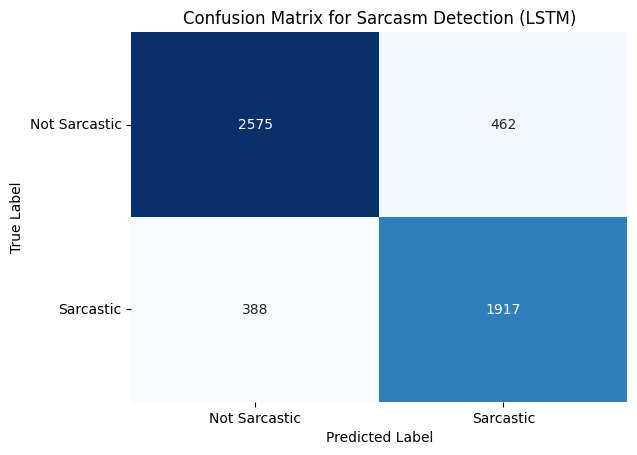

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Predict the labels for the test data
predictions_lstm = model_lstm.predict(testing_padded)
# Convert the predictions to binary values
binary_predictions_lstm = tf.keras.backend.cast(tf.keras.backend.greater(predictions_lstm, 0.5), tf.int32)

# Generate the confusion matrix
cm_lstm = confusion_matrix(testing_labels, binary_predictions_lstm)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Set the labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Sarcasm Detection (LSTM)")

# Set the x-tick labels
plt.xticks([0.5,1.5], ['Not Sarcastic', 'Sarcastic'])
plt.yticks([0.5,1.5], ['Not Sarcastic', 'Sarcastic'], rotation=0)

plt.show()

##Model_2: Using Convolutional Layer

Applying a convolutional layer for NLP sarcasm detection provides several benefits. It effectively extracts important features from text, capturing local patterns such as n-grams, which are crucial for identifying sarcasm. Convolutional layers are computationally efficient, allowing for faster training times. They use shared weights, reducing the number of parameters and making the model less prone to overfitting. Additionally, combining convolutional layers with pooling layers like GlobalMaxPooling1D helps capture the most relevant features from the entire text, enhancing sarcasm detection.

In [15]:
# Parameters
embedding_dim = 16
filters = 128
kernel_size = 5
dense_dim = 6

# Model Definition with Conv1D
model_conv = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters, kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 120, 16)           160000    
                                                                 
 conv1d (Conv1D)             (None, 116, 128)          10368     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense_2 (Dense)             (None, 6)                 774       
                                                                 
 dense_3 (Dense)             (None, 1)                 7         
                                                                 
Total params: 171149 (668.55 KB)
Trainable params: 171149 (668.55 KB)
Non-trainable params: 0 (0.00 Byte)
______________

In [16]:
# Train the model
history_conv = model_conv.fit(training_padded, training_labels, epochs=10, validation_data=(testing_padded, testing_labels))

Epoch 1/10
668/668 [==============================] - 9s 12ms/step - loss: 0.4389 - accuracy: 0.7828 - val_loss: 0.3496 - val_accuracy: 0.8465
Epoch 2/10
668/668 [==============================] - 8s 13ms/step - loss: 0.2307 - accuracy: 0.9066 - val_loss: 0.3621 - val_accuracy: 0.8476
Epoch 3/10
668/668 [==============================] - 7s 11ms/step - loss: 0.1259 - accuracy: 0.9568 - val_loss: 0.4335 - val_accuracy: 0.8420
Epoch 4/10
668/668 [==============================] - 8s 12ms/step - loss: 0.0589 - accuracy: 0.9817 - val_loss: 0.5766 - val_accuracy: 0.8429
Epoch 5/10
668/668 [==============================] - 8s 12ms/step - loss: 0.0255 - accuracy: 0.9932 - val_loss: 0.6911 - val_accuracy: 0.8336
Epoch 6/10
668/668 [==============================] - 7s 10ms/step - loss: 0.0104 - accuracy: 0.9977 - val_loss: 0.8088 - val_accuracy: 0.8343
Epoch 7/10
668/668 [==============================] - 8s 13ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.9035 - val_accuracy: 0.8325

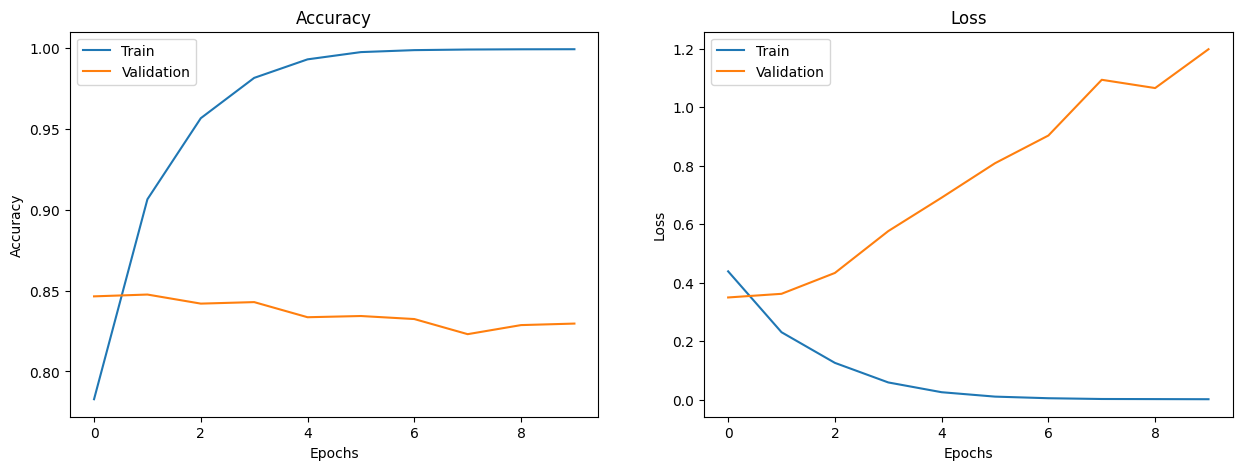

In [17]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the accuracy history on the first subplot
ax1.plot(history_conv.history['accuracy'])
ax1.plot(history_conv.history['val_accuracy'])
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot the loss history on the second subplot
ax2.plot(history_conv.history['loss'])
ax2.plot(history_conv.history['val_loss'])
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(['Train', 'Validation'], loc='upper left')

# Show the plot
plt.show()


167/167 [==============================] - 1s 3ms/step


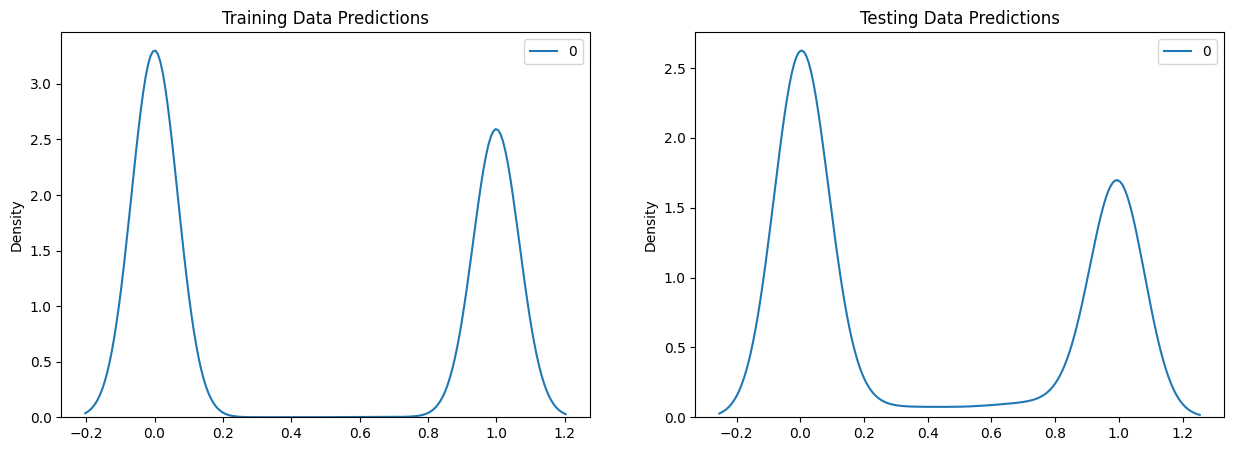

In [25]:
# Kernel Density Plots of Convolutional Model Predictions for Training and Testing Data

# Calculate the predicted probabilities for both training and testing data
train_pred_prob_conv = model_conv.predict(training_padded)
test_pred_prob_conv = model_conv.predict(testing_padded)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the distribution of predicted probabilities for training data
sns.kdeplot(train_pred_prob_conv, ax=ax1)
ax1.set_title('Training Data Predictions')

# Plot the distribution of predicted probabilities for testing data
sns.kdeplot(test_pred_prob_conv, ax=ax2)
ax2.set_title('Testing Data Predictions')

# Show the plot
plt.show()


167/167 [==============================] - 4s 23ms/step


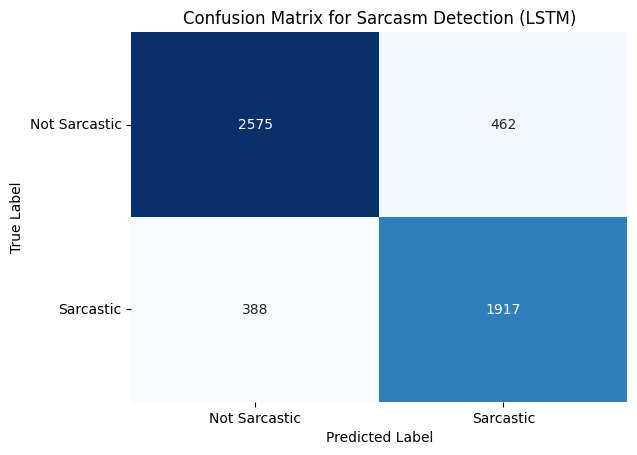

In [27]:
# Predict the labels for the test data
predictions_conv = model_lstm.predict(testing_padded)
# Convert the predictions to binary values
binary_predictions_conv = tf.keras.backend.cast(tf.keras.backend.greater(predictions_conv, 0.5), tf.int32)

# Generate the confusion matrix
cm_conv = confusion_matrix(testing_labels, binary_predictions_conv)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)

# Set the labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Sarcasm Detection (LSTM)")

# Set the x-tick labels
plt.xticks([0.5,1.5], ['Not Sarcastic', 'Sarcastic'])
plt.yticks([0.5,1.5], ['Not Sarcastic', 'Sarcastic'], rotation=0)

plt.show()

##Model_3: Using GRU

GRU (Gated Recurrent Unit) usage in sarcasm detection offers benefits like efficient memory handling, faster training, and improved capture of long-range dependencies essential for understanding sarcasm. Its simpler architecture and reduced vulnerability to vanishing gradient issues contribute to quicker convergence and better performance in capturing subtle linguistic cues.

In [18]:
# Parameters
embedding_dim = 16
gru_dim = 32
dense_dim = 6

# Model Definition with GRU
model_gru = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(gru_dim)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Print the model summary
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 120, 16)           160000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 64)                9600      
 onal)                                                           
                                                                 
 dense_4 (Dense)             (None, 6)                 390       
                                                                 
 dense_5 (Dense)             (None, 1)                 7         
                                                                 
Total params: 169997 (664.05 KB)
Trainable params: 169997 (664.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
history_gru = model_gru.fit(training_padded, training_labels, batch_size=128, epochs=10, validation_data=(testing_padded, testing_labels))

Epoch 1/10
167/167 [==============================] - 24s 116ms/step - loss: 0.5001 - accuracy: 0.7348 - val_loss: 0.3438 - val_accuracy: 0.8452
Epoch 2/10
167/167 [==============================] - 22s 132ms/step - loss: 0.2496 - accuracy: 0.8975 - val_loss: 0.3395 - val_accuracy: 0.8551
Epoch 3/10
167/167 [==============================] - 20s 120ms/step - loss: 0.1785 - accuracy: 0.9298 - val_loss: 0.3799 - val_accuracy: 0.8527
Epoch 4/10
167/167 [==============================] - 24s 142ms/step - loss: 0.1371 - accuracy: 0.9501 - val_loss: 0.4215 - val_accuracy: 0.8458
Epoch 5/10
167/167 [==============================] - 19s 114ms/step - loss: 0.1091 - accuracy: 0.9604 - val_loss: 0.4784 - val_accuracy: 0.8433
Epoch 6/10
167/167 [==============================] - 21s 123ms/step - loss: 0.0858 - accuracy: 0.9700 - val_loss: 0.5524 - val_accuracy: 0.8373
Epoch 7/10
167/167 [==============================] - 21s 124ms/step - loss: 0.0675 - accuracy: 0.9776 - val_loss: 0.6340 - val_ac

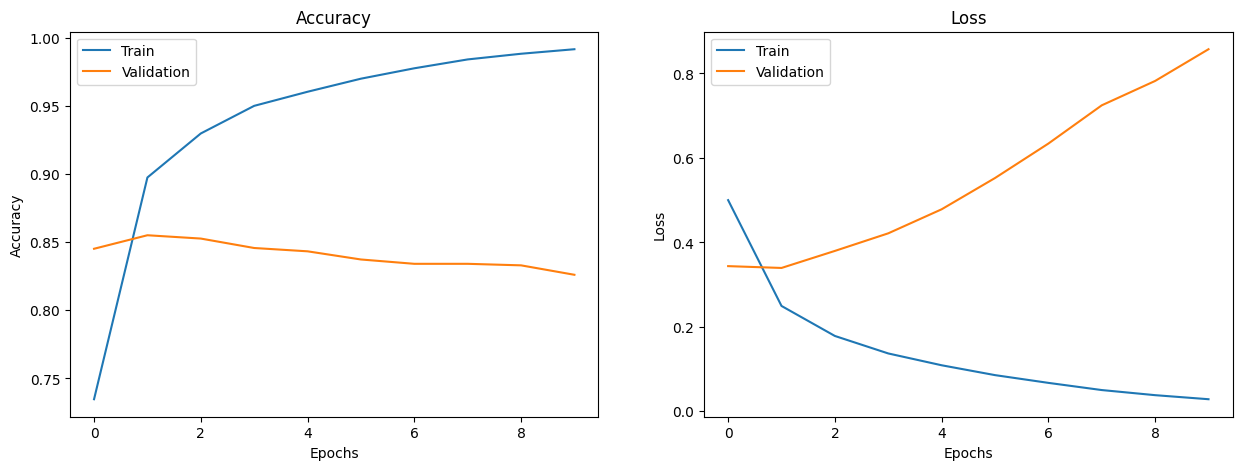

In [20]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the accuracy history on the first subplot
ax1.plot(history_gru.history['accuracy'])
ax1.plot(history_gru.history['val_accuracy'])
ax1.set_title('Accuracy')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.legend(['Train', 'Validation'], loc='upper left')

# Plot the loss history on the second subplot
ax2.plot(history_gru.history['loss'])
ax2.plot(history_gru.history['val_loss'])
ax2.set_title('Loss')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')
ax2.legend(['Train', 'Validation'], loc='upper left')

# Show the plot
plt.show()


167/167 [==============================] - 3s 20ms/step


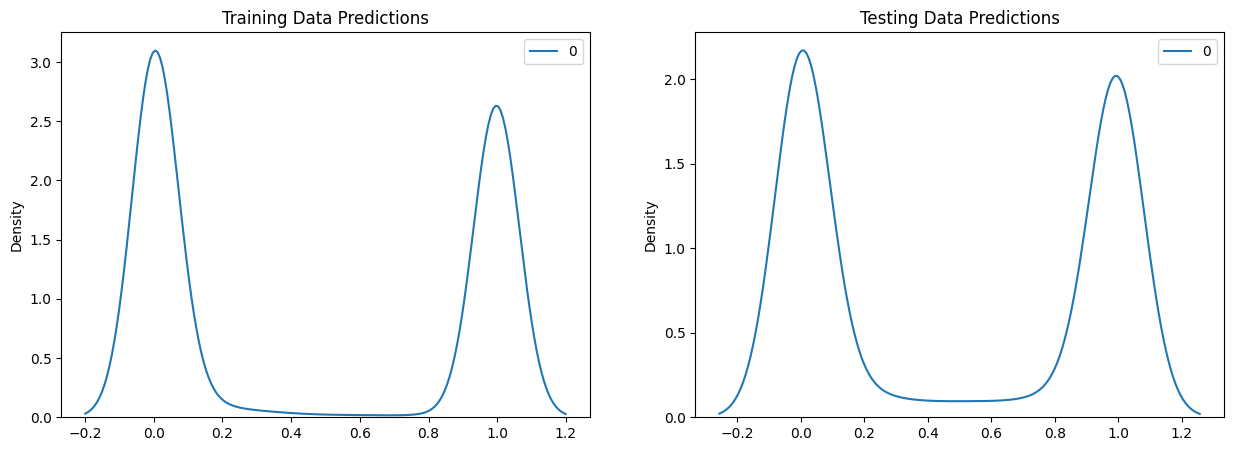

In [29]:
# Kernel Density Plots of GRU Model Predictions for Training and Testing Data

# Calculate the predicted probabilities for both training and testing data
train_pred_prob_gru = model_gru.predict(training_padded)
test_pred_prob_gru = model_gru.predict(testing_padded)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot the distribution of predicted probabilities for training data
sns.kdeplot(train_pred_prob_gru, ax=ax1)
ax1.set_title('Training Data Predictions')

# Plot the distribution of predicted probabilities for testing data
sns.kdeplot(test_pred_prob_gru, ax=ax2)
ax2.set_title('Testing Data Predictions')

# Show the plot
plt.show()


167/167 [==============================] - 2s 14ms/step


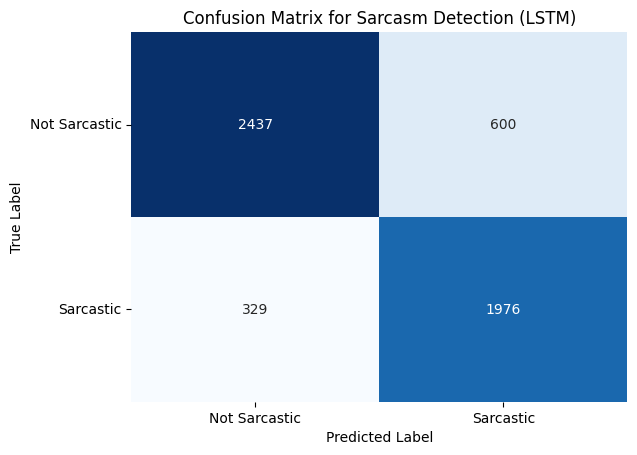

In [30]:
# Predict the labels for the test data
predictions_gru = model_gru.predict(testing_padded)
# Convert the predictions to binary values
binary_predictions_gru = tf.keras.backend.cast(tf.keras.backend.greater(predictions_gru, 0.5), tf.int32)

# Generate the confusion matrix
cm_gru = confusion_matrix(testing_labels, binary_predictions_gru)

# Create a heatmap of the confusion matrix
sns.heatmap(cm_gru, annot=True, fmt="d", cmap="Blues", cbar=False)

# Set the labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Sarcasm Detection (LSTM)")

# Set the x-tick labels
plt.xticks([0.5,1.5], ['Not Sarcastic', 'Sarcastic'])
plt.yticks([0.5,1.5], ['Not Sarcastic', 'Sarcastic'], rotation=0)

plt.show()